In [1]:
!git clone https://github.com/microsoft/otdd/

fatal: destination path 'otdd' already exists and is not an empty directory.


In [2]:
%pip install -r otdd/requirements.txt

  Cloning https://github.com/jeanfeydy/geomloss to /tmp/pip-req-build-kr9x5t3y
  Running command git clone --filter=blob:none --quiet https://github.com/jeanfeydy/geomloss /tmp/pip-req-build-kr9x5t3y
  Resolved https://github.com/jeanfeydy/geomloss to commit 5804ca57f84bd95226efd1d44929022deb9cd23a
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/rossant/ipycache to /tmp/pip-req-build-wasb1uox
  Running command git clone --filter=blob:none --quiet https://github.com/rossant/ipycache /tmp/pip-req-build-wasb1uox
  Resolved https://github.com/rossant/ipycache to commit 906d8ee9e201ab2bc4029fd4d47d4bff5bb64b52
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for torchtext from https://files.pythonhosted.org/packages/a5/d8/1ae508affaaa3d6d41d044177ddaf22aa8d4e5281074340ad072094dd203/torchtext-0.16.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached sentence-transformers-2.2.2.tar.gz (85 kB)
  Preparing metadata (setup.py) ... done
  Ob

In [ ]:
# # Load datasets
# loaders_src = load_torchvision_data('MNIST', valid_size=0, resize = 28, maxsize=2000)[0]
# loaders_tgt = load_torchvision_data('USPS',  valid_size=0, resize = 28, maxsize=2000)[0]

# # Instantiate distance
# dist = DatasetDistance(loaders_src['train'], loaders_tgt['train'],
#                        inner_ot_method = 'exact',
#                        debiased_loss = True,
#                        p = 2, entreg = 1e-1,
#                        device='cpu')

# d = dist.distance(maxsamples = 1000)
# print(f'OTDD(src,tgt)={d}')

In [ ]:
'''
change distance.py => line 322-323 to:
self.classes1 = self.V1
self.classes2 = self.V2
'''

'\nchange distance.py => line 322-323 to:\nself.classes1 = self.V1\nself.classes2 = self.V2\n'

In [1]:
# ! pip install torch
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
def gen_synth_label_random(y, tr):
    lb = np.zeros(y.shape[0])
    for i in range(y.shape[0]):
        if np.random.random() > tr:
            lb[i] = int(np.random.random() > 0.5)
        else:
            lb[i] = y[i]
    return lb


In [8]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, thresh=0, transform=None, label_cols=[""], label=""):
        df = pd.read_csv(csv_file)
        self.data = torch.FloatTensor(df.drop(label_cols, axis=1).values)
        self.transform = transform
        self.targets = torch.Tensor(df[label])
        #self.targets = torch.Tensor(np.zeros(df.shape[0]))
        # if label == "Price":
        #   #self.targets = torch.Tensor((df[label] > thresh).astype(int))
        #    self.targets = torch.Tensor(gen_synth_label_random(df['Rating'], tr))
        # if label == 'label':
        #     print("here")
        #     self.targets = torch.Tensor(np.zeros(df.shape[0]))
        self.classes = ['0.0', '1.0']
        self.indices = np.arange(df.shape[0])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx, :]
        if self.transform:
            sample = self.transform(sample)

        return sample, self.targets[idx]

In [13]:
from otdd.otdd.pytorch.distance import DatasetDistance

#csv_file_path = 'airbnb_cleaned_with_rating.csv'
# csv_file_path = 'ada_prior_cleaned_with_hpw.csv'
# label_cols = ['label', 'hoursPerWeek']
#label_cols = ['Rating', 'Price']

# csv_file_path_1 = '/home/preethi/projects/hitlda-project/auto-sklearn/data/clean_airbnb_data_mlp.csv'
# csv_file_path_2 = '/home/preethi/projects/hitlda-project/auto-sklearn/data/clean_airbnb_data_gb.csv'
csv_file_path_1 = '/home/preethi/projects/hitlda-project/auto-sklearn/data/csv1.csv'
csv_file_path_2 = '/home/preethi/projects/hitlda-project/auto-sklearn/data/csv2.csv'
label_cols = ['Rating']

agrs = []
dists = []
trs = []

# for tr in np.arange(0, 1, 0.1):
#for tr in np.arange(0, 1, 0.05):
dataset_1 = CustomDataset(csv_file_path_1, label_cols=label_cols, label=label_cols[0])
dataset_2 = CustomDataset(csv_file_path_2, label_cols=label_cols, label=label_cols[0])

agr = (dataset_1.targets == dataset_2.targets).numpy().mean()
print("% Agreement", agr)

dist = DatasetDistance(dataset_1, dataset_2,
                    inner_ot_method = 'exact',
                    debiased_loss = False,
                    p = 1, entreg = 1e-1,
                    device='cpu')
d = dist.distance(maxsamples=600)
print(f'OTDD(src,tgt)={d}')
dists.append(d)
agrs.append(agr)
# trs.append(tr)

% Agreement 1.0


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

OTDD(src,tgt)=0.29188817739486694


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

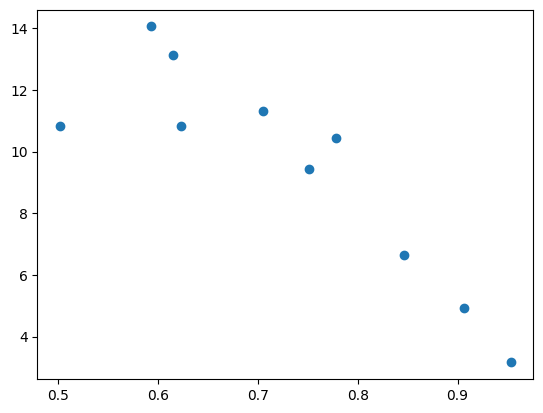

In [ ]:
plt.scatter(agrs, dists)
plt.show()

In [ ]:
(dataset_1.targets == dataset_2.targets).numpy().mean()

1.0